In [129]:
import h5py
from astropy.stats import RipleysKEstimator
import numpy as np
import seaborn as sns
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import convolve2d
from skgstat import Variogram
import matplotlib.cm as cm
import copy

In [30]:
# generate point pattern
# pattern A: uniform distribution on a small area
# pattern B: uniform distribution on a large area
N = 100
A = np.random.uniform(low=5,high=15,size=(N,2))
B = copy.deepcopy(A)

In [88]:
# generate point pattern
# pattern C: mixture of 5 Gaussians
K = 5
obs = int(N/K)
C = np.zeros((N,2))
mean_x = [4,4,10,16,16]
mean_y = [16,4,10,16,4]

for i in range(K):
    C[(i*obs):((i+1)*obs),0] = np.random.normal(loc=mean_x[i],
                               scale=0.5, size=obs)
    C[(i*obs):((i+1)*obs),1] = np.random.normal(loc=mean_y[i],
                               scale=0.5, size=obs)

(0, 20)

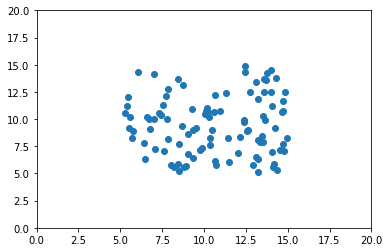

In [89]:
plt.scatter(x=A[:,0],y=A[:,1])
plt.xlim((0,20))
plt.ylim((0,20))

(0, 20)

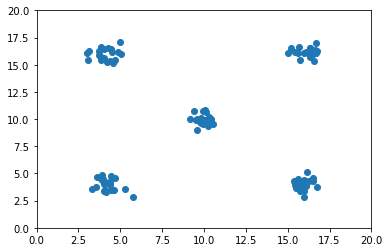

In [90]:
plt.scatter(x=C[:,0],y=C[:,1])
plt.xlim((0,20))
plt.ylim((0,20))

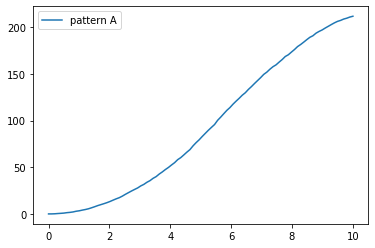

In [91]:
Kest = RipleysKEstimator(area=100, x_max=15, x_min=5,y_max=15, y_min=5)
r = np.linspace(0,10,num=100)
res = Kest(data=A, radii=r, mode='ripley')
plt.plot(r,res,label="pattern A")
plt.legend()

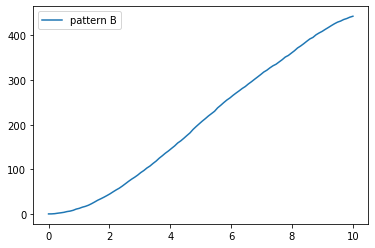

In [92]:
Kest = RipleysKEstimator(area=400, x_max=20, x_min=0,y_max=20, y_min=0)
r = np.linspace(0,10,num=100)
res = Kest(data=B, radii=r, mode='ripley')
plt.plot(r,res,label="pattern B")
plt.legend()

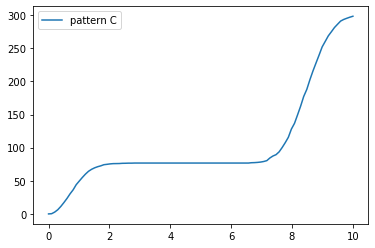

In [93]:
Kest = RipleysKEstimator(area=400, x_max=20, x_min=0,y_max=20, y_min=0)
r = np.linspace(0,10,num=100)
res = Kest(data=C, radii=r, mode='ripley')
plt.plot(r,res,label="pattern C")
plt.legend()

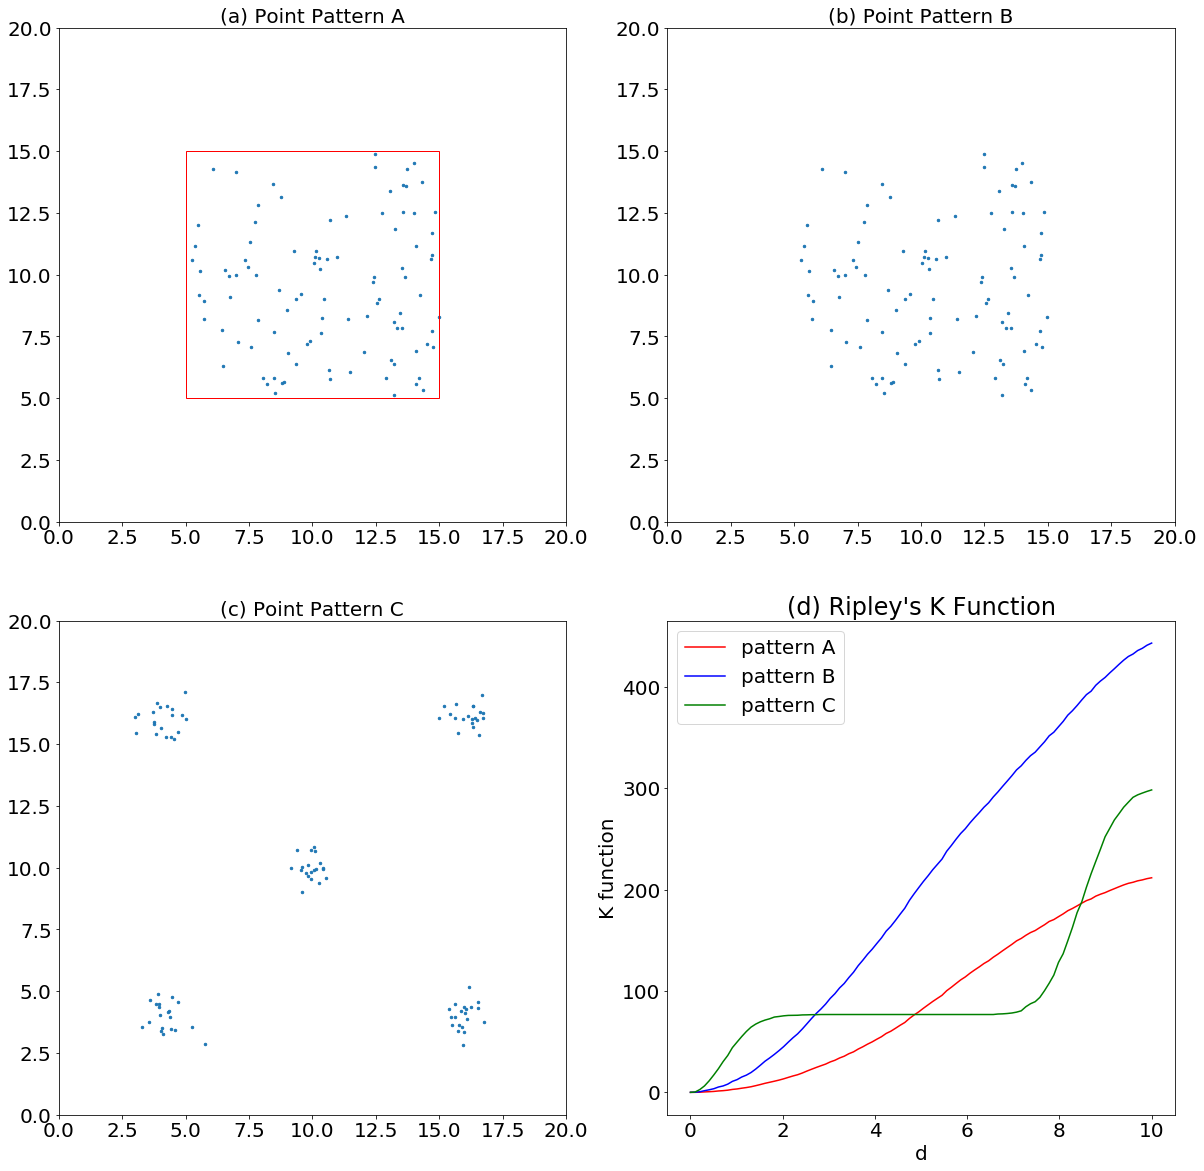

In [133]:
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))

# plot pattern A
ax[0,0] = plt.subplot(2,2,1)
ax[0,0].scatter(x=A[:,0],y=A[:,1],s=6)
ax[0,0].set_xlim((0,20))
ax[0,0].set_ylim((0,20))
ax[0,0].set_title("(a) Point Pattern A", fontsize=20)
ax[0,0].add_patch(Rectangle((5, 5), 10, 10, linewidth=1, edgecolor='r', facecolor='none'))


# plot pattern B
plt.subplot(2,2,2)
plt.scatter(x=B[:,0],y=B[:,1],s=6)
plt.xlim((0,20))
plt.ylim((0,20))
plt.title("(b) Point Pattern B", fontsize=20)

# plot pattern C
plt.subplot(2,2,3)
plt.scatter(x=C[:,0],y=C[:,1],s=6)
plt.xlim((0,20))
plt.ylim((0,20))
plt.title("(c) Point Pattern C", fontsize=20)

# plot RipK function
plt.subplot(2,2,4)
Kest = RipleysKEstimator(area=100, x_max=15, x_min=5,y_max=15, y_min=5)
r = np.linspace(0,10,num=100)
res = Kest(data=A, radii=r, mode='ripley')
plt.plot(r,res,label="pattern A",c="r")

Kest = RipleysKEstimator(area=400, x_max=20, x_min=0,y_max=20, y_min=0)
r = np.linspace(0,10,num=100)
res = Kest(data=B, radii=r, mode='ripley')
plt.plot(r,res,label="pattern B",c="b")

Kest = RipleysKEstimator(area=400, x_max=20, x_min=0,y_max=20, y_min=0)
r = np.linspace(0,10,num=100)
res = Kest(data=C, radii=r, mode='ripley')
plt.plot(r,res,label="pattern C",c="g")
plt.title("(d) Ripley's K Function")
plt.ylabel("K function")
plt.xlabel("d")
plt.legend(fontsize=20)

In [134]:
fig.savefig("../paper_writing/ripley_K.png",dpi=300)